In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

##Merging all mothnly sales data into one csv file

In [44]:
# List of monthly sales CSV files
monthly_sales = ['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv',
                 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv',
                 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv',
                 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']

# Initialize an empty list to hold DataFrames
data_frames = []

# Loop through the monthly sales files and read them into DataFrames
for monthly_file in monthly_sales:
    # Read the monthly sales data into a DataFrame
    monthly_data = pd.read_csv(monthly_file)

    # Append the monthly data to the list of DataFrames
    data_frames.append(monthly_data)

# Concatenate all DataFrames into a single yearly sales DataFrame
yearly_sales = pd.concat(data_frames, ignore_index=True)

# Save the merged data to a single yearly sales CSV file
yearly_sales.to_csv('Yearly_Sales_2019.csv', index=False)

df=pd.read_csv("Yearly_Sales_2019.csv")

##Dataset verification

In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
df.shape

(186850, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [49]:
nan_rows = df[df.isna().any(axis=1)]
nan_rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Data Cleaning



In [50]:
df = df.dropna(how='all')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


##Adding columns to answer the buiness questions sales ,month and city,hour ,munit and count columns

In [47]:
df = df[df['Order Date'] .str[:2]!= 'Or']

In [51]:
df['Month'] = df['Order Date'].str[:2]
df['Month'] = df['Month'].astype('int')

In [52]:
# Ensure the 'Quantity Ordered' and 'Price Each' columns are of numeric data type
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

# Create the 'Sales' column by multiplying 'Quantity Ordered' and 'Price Each'
df['Sales'] = df['Quantity Ordered'] * df['Price Each']


In [53]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")


In [54]:
# Add hour column
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['Count'] = 1


In [43]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour', 'Minute',
       'Count'],
      dtype='object')

##Data exploration and visualisations.



##1. Identifying the Best Sales Month: Determining which month witnessed the highest sales and calculating the revenue generated during that period.




In [16]:
# Group by 'Month' and sum 'Sales' for each month
monthly_sales = df.groupby('Month').sum()
monthly_sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [17]:
monthly_sales = df.groupby('Month')['Sales'].sum()
best_month = monthly_sales.idxmax()
highest_sales = monthly_sales.max()

print(f"The best month for sales was Month {best_month} with total earnings of ${highest_sales:.2f}")


The best month for sales was Month 12 with total earnings of $4613443.34


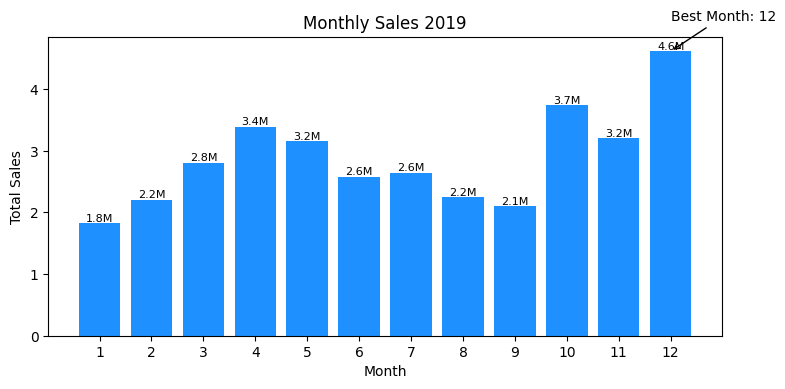

In [18]:
# Convert sales to millions with one decimal place
monthly_sales_in_millions = monthly_sales / 1_000_000

# Create a bar plot
plt.figure(figsize=(8, 4))
bars = plt.bar(monthly_sales.index, monthly_sales_in_millions, color='dodgerblue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales 2019')
plt.xticks(monthly_sales.index)

# Label each bar with sales value
for bar, sales_value in zip(bars, monthly_sales_in_millions):
    plt.text(bar.get_x() + bar.get_width() / 2, sales_value, f'{sales_value:.1f}M',
             ha='center', va='bottom', fontsize=8)

# Highlight the best month
plt.annotate(f"Best Month: {best_month}", xy=(best_month, highest_sales / 1_000_000),
             xytext=(best_month, (highest_sales / 1_000_000) + 0.5), arrowprops=dict(arrowstyle='->'), fontsize=10)

plt.tight_layout()
plt.show()


##2.Analyzing Regional Sales: Uncovering which cities are the most significant contributors to product sales, thereby assisting in targeted regional marketing efforts.



In [32]:
df.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
City,,,,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58,214264,442932,14881
Austin (TX),11153,1809873.61,69829,1819581.75,141946,289060,9905
Boston (MA),22528,3637409.77,141112,3661642.01,288225,590442,19934
Dallas (TX),16730,2752627.82,104620,2767975.40,214390,435155,14820
Los Angeles (CA),33289,5421435.23,208325,5452570.80,427444,866638,29605
New York City (NY),27932,4635370.83,175741,4664317.43,357696,733598,24876
Portland (ME),2750,447189.25,17144,449758.27,35211,72856,2455
Portland (OR),11303,1860558.22,70621,1870732.34,144421,295533,10010
San Francisco (CA),50239,8211461.74,315520,8262203.91,643265,1319477,44732


In [33]:
# Group the data by city and calculate total quantity of products sold
city_product_quantity = df.groupby('City')['Quantity Ordered'].sum()

# Find the city with the highest total quantity of products sold
best_city = city_product_quantity.idxmax()
highest_quantity_city = city_product_quantity.max()

print(f"The city that sold the highest number of products is {best_city} with a total of {highest_quantity_city} products sold.")

The city that sold the highest number of products is San Francisco  (CA) with a total of 50239 products sold.


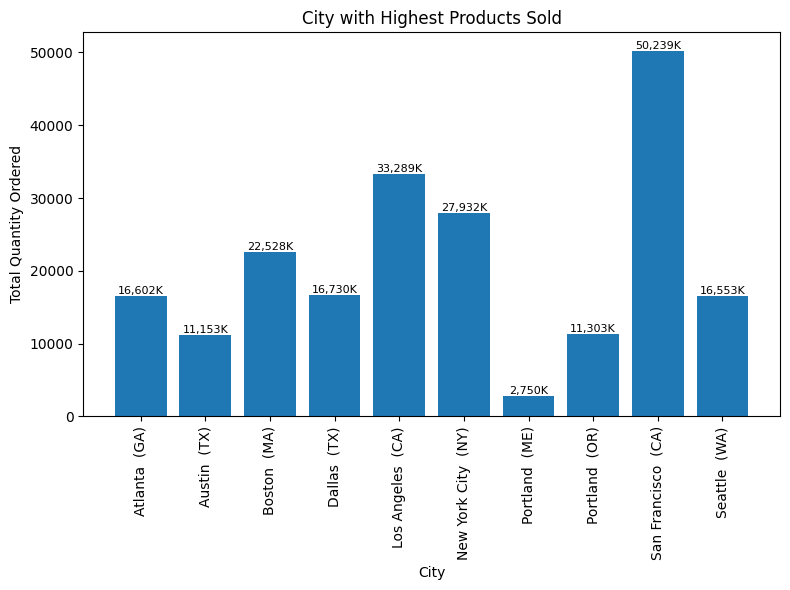

In [41]:
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(city_product_quantity.index, city_product_quantity)

# Add labels with a suffix to each bar
for i, qty in enumerate(city_product_quantity):
    plt.text(i, qty, f'{qty:,}K', ha='center', va='bottom', fontsize=8)

# Customize the chart
plt.xlabel('City')
plt.ylabel('Total Quantity Ordered')
plt.title('City with Highest Products Sold')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the Matplotlib chart
plt.show()


##3. Optimal Advertising Timing: Pinpointing the ideal time to display advertisements to maximize the likelihood of customers making purchases.




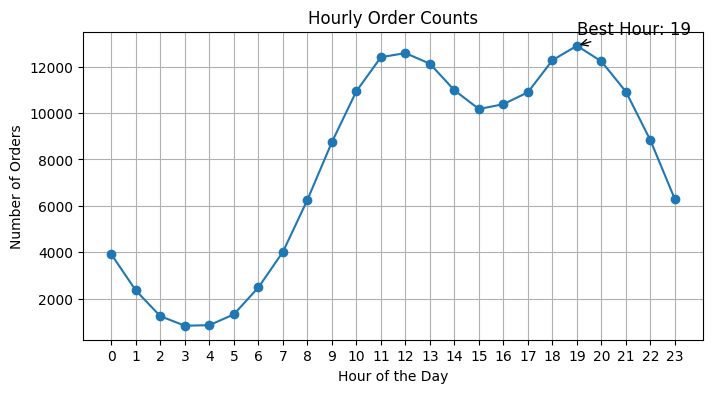

In [42]:
# Group the data by the 'Hour' column and count the orders for each hour
hourly_orders = df.groupby('Hour')['Count'].count()

# Create a line graph to visualize the hourly order counts
plt.figure(figsize=(8, 4))
plt.plot(hourly_orders.index, hourly_orders.values, marker='o', linestyle='-')
plt.title('Hourly Order Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(hourly_orders.index)
plt.grid(True)

# Find the best hour for advertising
best_hour = hourly_orders.idxmax()
best_hour_orders = hourly_orders.max()
plt.annotate(f"Best Hour: {best_hour}", xy=(best_hour, best_hour_orders), xytext=(best_hour, best_hour_orders + 500),
             arrowprops=dict(arrowstyle='->'), fontsize=12)

plt.show()



##4. Recognizing Frequently Sold-Together Products: Discovering which products are commonly purchased together can lead to cross-selling opportunities and improved inventory management.




In [22]:
# Find duplicate 'Order ID'
df1 = df[df['Order ID'].duplicated(keep=False)]

# Group products by 'Order ID'
df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

# Drop duplicates and keep 'Order ID' and 'Grouped' columns
df2 = df1[['Order ID', 'Grouped']].drop_duplicates()



In [23]:
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


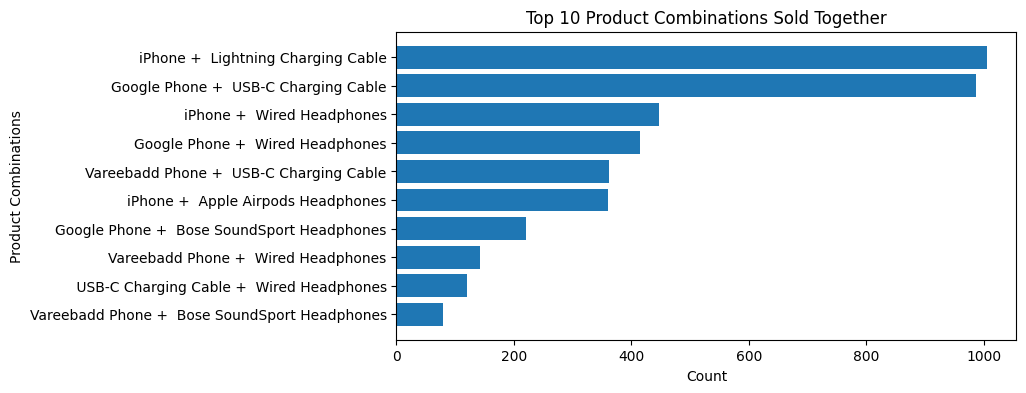

In [24]:
# Get the top 10 combinations and their counts
top_combinations = count.most_common(10)

# Separate the combinations and their counts
combinations, counts = zip(*top_combinations)

# Convert the combinations to strings for visualization
combinations = [' + '.join(comb) for comb in combinations]

# Plot the combinations
plt.figure(figsize=(8, 4))
plt.barh(combinations, counts)
plt.xlabel('Count')
plt.ylabel('Product Combinations')
plt.title('Top 10 Product Combinations Sold Together')
plt.gca().invert_yaxis()  # Invert y-axis to show the most common combinations at the top
plt.show()


##5. Identifying Top-Selling Products: Highlighting the product that dominates sales, allowing for focused promotion and sales expansion.




In [25]:
# Group the data by product and sum the sales for each product
product_sales = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
# Get the product with the highest sales count
best_selling_product = product_sales.index[0]

# Display the best-selling product
print(f"The product that sold the most is '{best_selling_product}' with {product_sales.iloc[0]} units sold.")


The product that sold the most is 'AAA Batteries (4-pack)' with 31017 units sold.


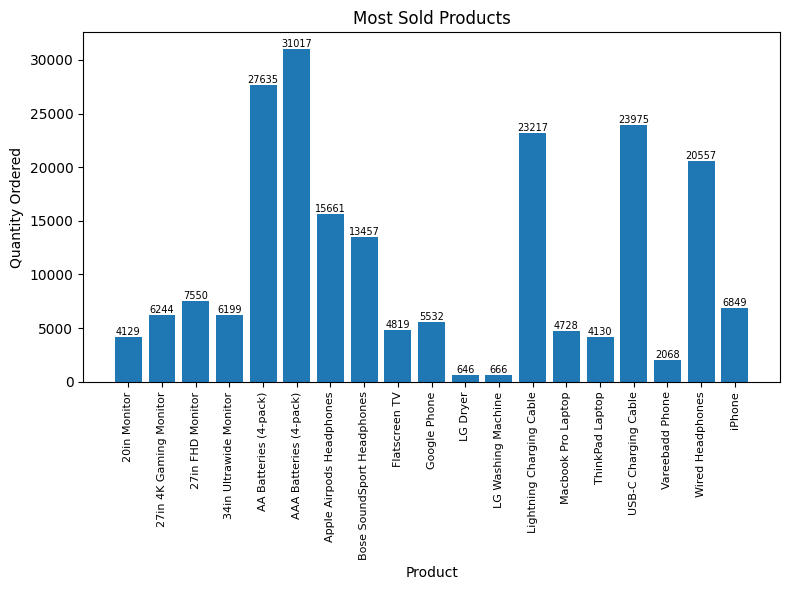

In [26]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.figure(figsize=(8, 6))
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)

# Add labels to each bar
for key, value in zip(keys, quantity_ordered):
    plt.text(key, value, f'{int(value)}', ha='center', va='bottom',fontsize=7)

plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Most Sold Products')
plt.tight_layout()
plt.show()
